# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Load Python Libraries

Initially, Python libraries used in the project are loaded.

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load CSV

"all_data.csv" is loaded in a data frame called "life_expectancy" in order to work with it in Python. The data frame has four different columns: 1) Country, 2) Year, 3) Life expectancy at birth (years) and 4) GDP.

In [5]:
life_expectancy = pd.read_csv("all_data.csv")

In [3]:
life_expectancy.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Inspecting the data

Inspection of the data is required in order to understand in detail what information the data contains. To do that, the unique() function of pandas is used to inspect the Country and Year columns of the data frame.

In [8]:
life_expectancy.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

There are 6 countries included in the data frame, Chile, Chine, Germany, Mexico, USA and Zimbabwe. Each country represents an area of the world, so the data is quite representative of the situation worldwide.

In [10]:
life_expectancy.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

The data present in the csv is colected between 2000 and 2015, included.

### Renaming columns

The name of column "Life expectancy at birth (years)" is not convinient to be used in the analysis since it is too long. For that reason the name its changed to "LEABY" which is more managable.

In [7]:
life_expectancy = life_expectancy.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
life_expectancy.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Exploratory plots

To start with the analysis of the data, the distribution of the GDP has been checked. Such distribution is very right skewed, with most of the values on the left-hand of the graph. 

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


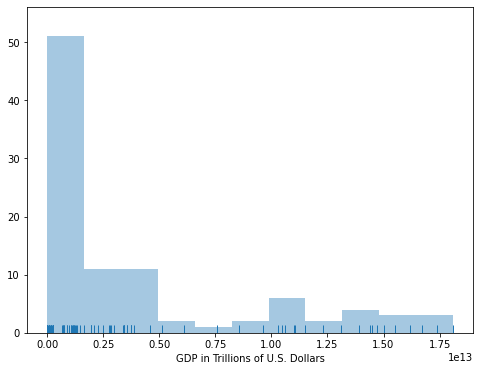

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(life_expectancy.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars");

Next, the distribution of the 'LEABY' is shown. LEABY distribution is very skewed to the left, with most values on the right-hand side of the graph, on the contrary to the GLP distribution.

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


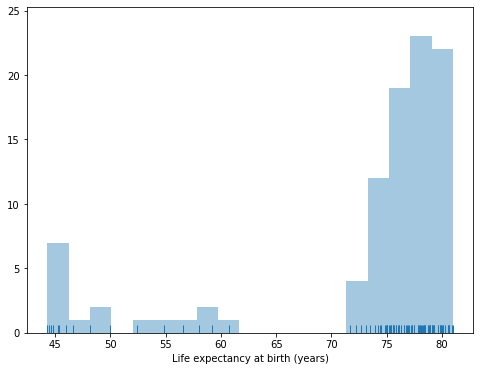

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(life_expectancy.LEABY, rug = True, kde=False)
plt.xlabel("Life expectancy at birth (years)");

The previous graphs do account for the specific contribution of each country in both GDP and LEABY. To do so, the average of both variables by country is calculated: 

In [28]:
life_expectancy_means = life_expectancy.drop('Year', axis = 1).groupby('Country').mean().reset_index()

In [29]:
life_expectancy_means

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Once the data is broken down by country, bar plots of the means can be analysed.
First, LEABY mean values of each country are inspected. Means of all countries except Zimbabwe are in the range of 70-80 years. This distribution explains the skew shape of the previous exploratory plots.

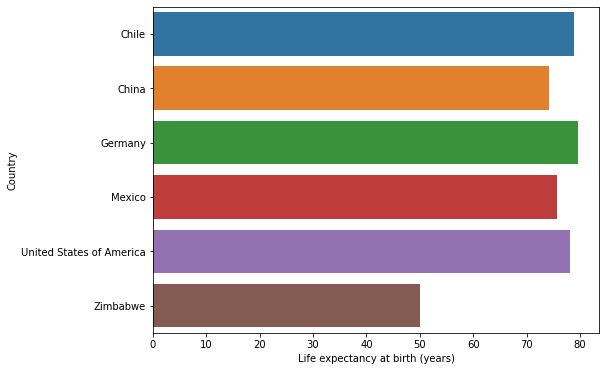

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY", y="Country", data=life_expectancy_means)
plt.xlabel("Life expectancy at birth (years)");

Regarding mean GDP values of each country, the USA presents a much higher GDP than the rest of the countries considered in the analysis. Zimbabwe's bar is not visible in the plot, and Chile's bar is very small with respect to the ones featured by the other countries taken into account. China, Germany and Mexico have rader similar average GDP values.

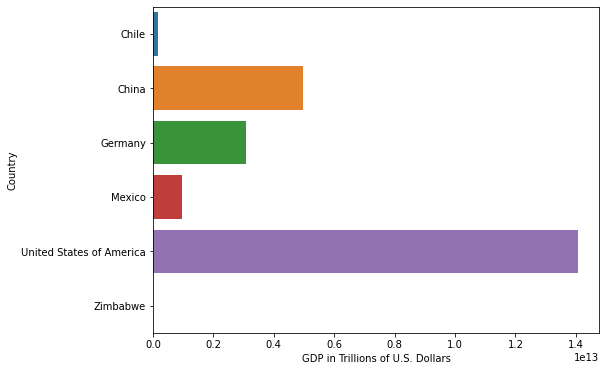

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=life_expectancy_means)
plt.xlabel("GDP in Trillions of U.S. Dollars");

### Violin plots

Violin plots are nice tool to check the distribution of a value. In the following section, violin plots for GDP and LEABY for each country are shown. 
GDP violin plot show a very wide distribution of GDP for both China (from 0 to around 1.5) and the USA (from around 0.5 to 2). In turn, Chile, Germany, Mexico and Zimbabwe present narrow distributions.
LEABY violin plot show a very wide distribution for Zimbabwe (from 30 to 70 years), while the rest of the countries are in the 70 to 90 years range.

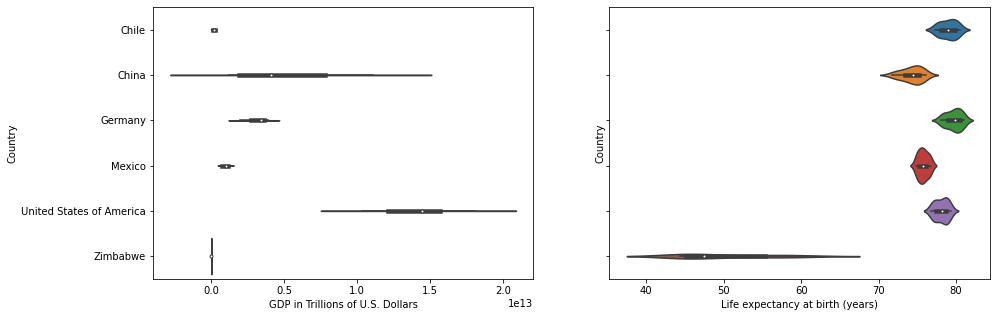

In [35]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=life_expectancy.GDP, y=life_expectancy.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=life_expectancy.LEABY, y=life_expectancy.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

### Swarm plots

To complement the violin plots, swarm plots are displayed below. The first row shows the swarm plots for both GDP and LEABY. The second row shows the overlap between violin and swarm plots.

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


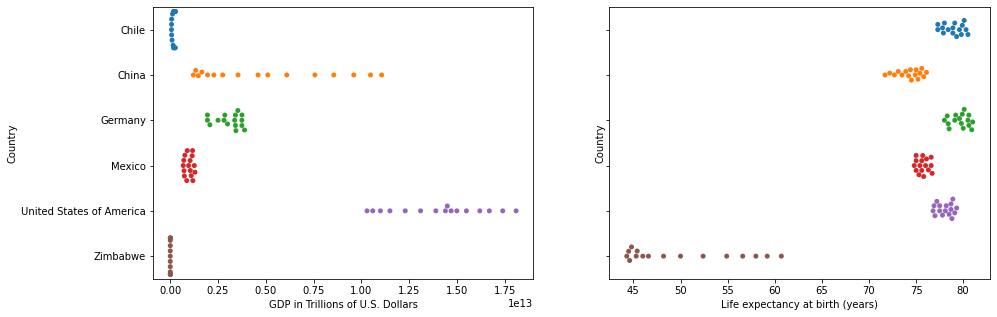

In [8]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.swarmplot(ax=axes[0], x=life_expectancy.GDP, y=life_expectancy.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax=axes[1], x=life_expectancy.LEABY, y=life_expectancy.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


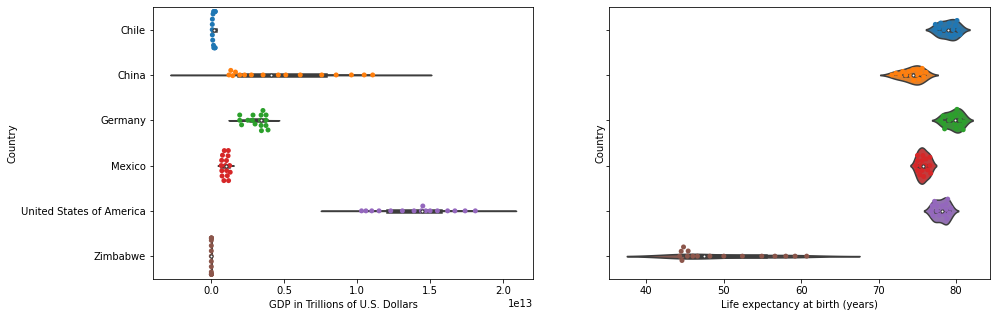

In [9]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.swarmplot(ax=axes[0], x=life_expectancy.GDP, y=life_expectancy.Country)
axes[0] = sns.violinplot(ax=axes[0], x=life_expectancy.GDP, y=life_expectancy.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax=axes[1], x=life_expectancy.LEABY, y=life_expectancy.Country)
axes[1] = sns.violinplot(ax=axes[1], x=life_expectancy.LEABY, y=life_expectancy.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

### Line plots

To analyse the change over the years of both GDP and LEABY, line plots are used. Both USA and China are the countries that have experienced a bigger increase in GDP during the considered years. In turn, GDP of the other considered countries has been similar during the considered 15 years.

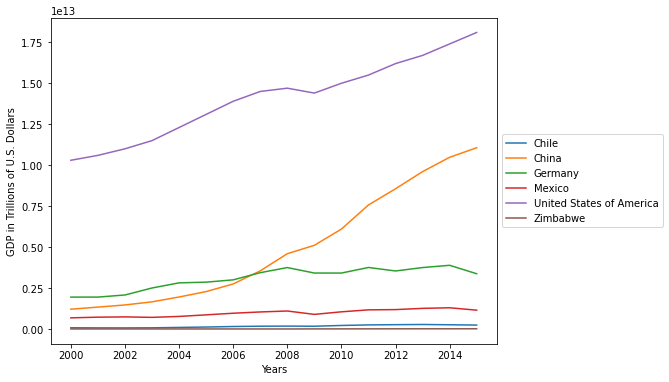

In [17]:
plt.figure(figsize=(8,6))
sns.lineplot(x=life_expectancy.Year, y=life_expectancy.GDP, hue=life_expectancy.Country)
plt.ylabel("GDP in Trillions of U.S. Dollars");
plt.xlabel("Years");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

Below, the break down by countries is shown. Mexico, Chile and Germany seem to have ups and downs in the considered years. 

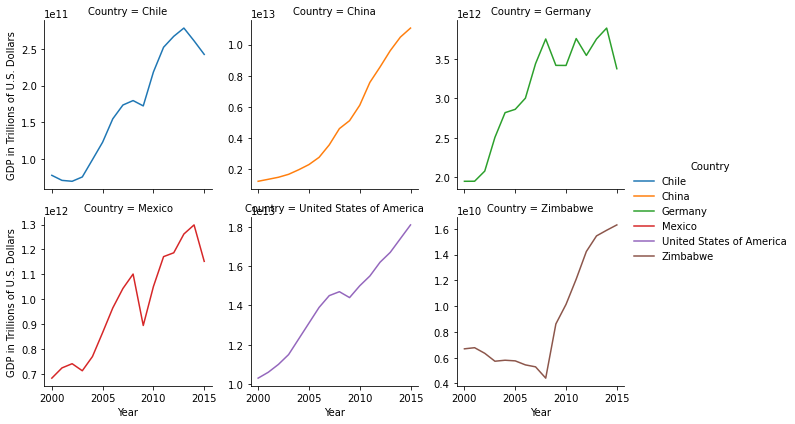

In [16]:
graphGDP = sns.FacetGrid(life_expectancy, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

Regarding LEABY, all considered countries (except Zimbabwe) seem to bee in the range of 70 to 80 years, with slow but steady increase.

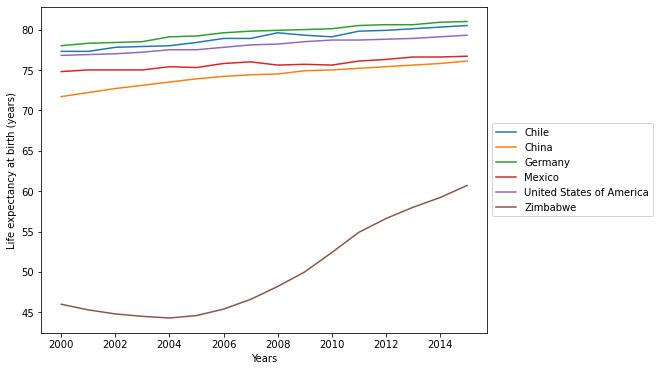

In [18]:
plt.figure(figsize=(8,6))
sns.lineplot(x=life_expectancy.Year, y=life_expectancy.LEABY, hue=life_expectancy.Country)
plt.ylabel("Life expectancy at birth (years)");
plt.xlabel("Years");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

Break down by country show that both Mexico and Chile have ups and downs in its life expectancy. Shapes of LEABY plots are similar to the previously shown GDP plots. Such fact can lead us to a possible relation between both variables.

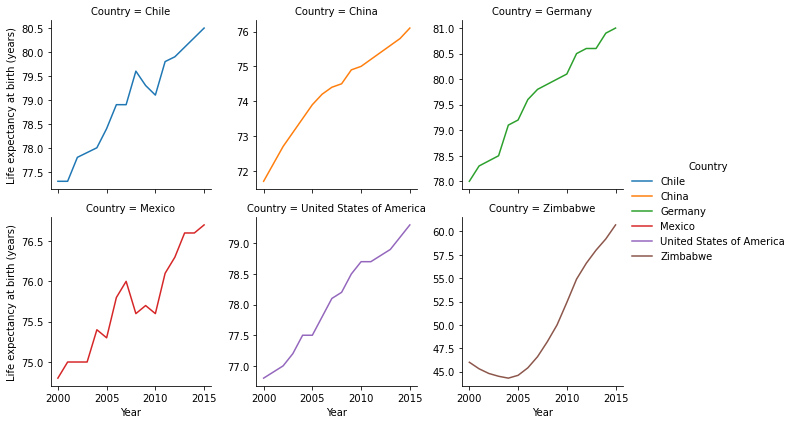

In [20]:
graphLEABY = sns.FacetGrid(life_expectancy, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

### Scatter plots

To analyse the possible relation between GDP and LEABY, scatter plots are shown below. Low GDP countries (Zimbabwe and Chile) present very flat distribution of LEABY, but very big differences between their values. China and the USA have very big slopes, while Germany and Mexico are in an intermediate range.

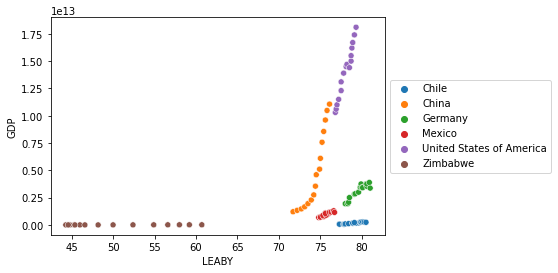

In [25]:
sns.scatterplot(x=life_expectancy.LEABY, y=life_expectancy.GDP, hue=life_expectancy.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

Break down by country show linear distribution for USA and Zimbabwe. China seems to have a logaritmic dependency between LEABY and GDP. Chile, Mexico and Germany present ups and downs, similar to the LEABY vs Year plots.


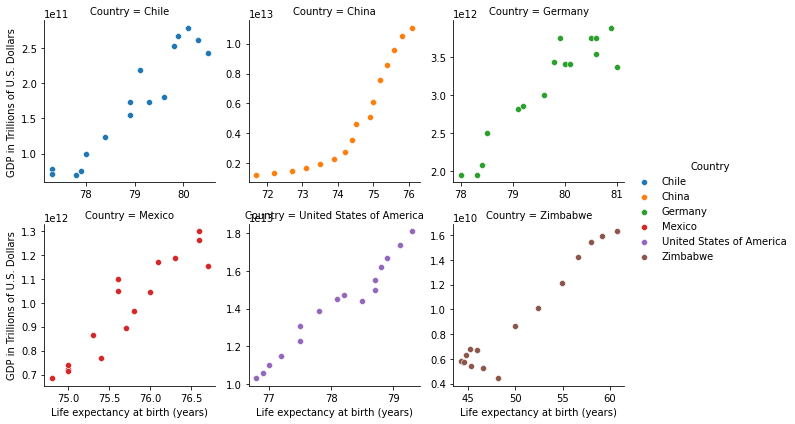

In [29]:
graphGDP2 = sns.FacetGrid(life_expectancy, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)

graphGDP2 = (graphGDP2.map(sns.scatterplot,"LEABY","GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)","GDP in Trillions of U.S. Dollars"))

graphGDP2;

# Conclusions

The present project has focused on how GDP and LEABY have evolved in the 2000-2015 years for various countries representing the different regions of the world.

- Both GDP and Life Expectancy have increased for the 6 selected countries over the considered 15 years. Countries that suffered the highest increase of LEABY and GDP have been Zimbabwe and China, respectively. 
- There is a positive correlation between GDP and life expectancy of a country. This means that countries with higher GDP present a higher life expectancy.
- Average life expectancy is in the range of 70-80 years. Zimbabwe is the only exception, with an average around 50 years.
- Life expectancy had a left skew dependency, with most of the observations on the right side.
- GDP had a right skew dependency, with most of the observations on the left side.
